   Days    Temp(°F)       Pre-fit Model Values (°F)          Residual Times   
    1         37          31.001682758506387                 -5.998317241493613           
    2         26          30.884645607718912                 4.884645607718912            
    3         20          30.774754356889844                 10.774754356889844           
    4         25          30.67204156916845                  5.672041569168449            
    5         25          30.576537680570457                 5.576537680570457            
    6         30          30.488270990959197                0.48827099095919735           
    7         34          30.407267655659755                 -3.592732344340245           
    8         28          30.33355167770857                   2.33355167770857            
    9         24          30.26714490074084                  6.267144900740838            
    10        21          30.20806700251775                  9.208067002517751            
    11     

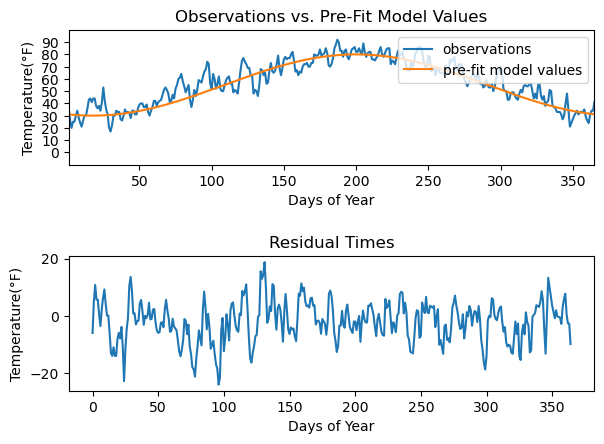

In [25]:
import math
import numpy as np
import matplotlib.pyplot as plt

def read_text(file):
    f = open(file, 'r')  # open the file and save it in the variable f
    text = f.read().splitlines() # read the file
    f.close()          
    return text
    
file = open (r'nyc_data.txt', 'r')
f = file.readlines()
temps= []
for line in f:
        temps.append(line[:-1])
temps_float = []
for i in range(1,366):
    temp = float(temps[i-1])
    temps_float.append(temp)
    
def lsq_fit():
    period=365
    y_offset=55
    amplitude=25
    time_offset=200
    yt=[]
    for t in range(1,366):
        y_time=y_offset+amplitude*math.cos(2*math.pi*(t-time_offset)/period)
        yt.append(y_time)
        
    residuals=[]
    for i in range(1,366):
        res=yt[i-1]-temps_float[i-1]
        residuals.append(res)
    return (yt ,residuals)
(yt,residuals)=lsq_fit()

def print_data():
    header = print(f"{'Days':^10}{'Temp(°F)':^10}{'Pre-fit Model Values (°F)':^38}{'Residual Times':^20}")
    for x in range(365):
        func = print(f"{x+1:^10}{temps[x]:^10}{yt[x]:^30}{residuals[x]:^40}")
    return(header, func)

print_data()


def plt_ts():
    days=[]
    for x in range(365):
        days.append(x+1)
    fig,axs=plt.subplots(2)
    axs[0].set_ylim([-10, 100])
    axs[0].set_xlim([1,365])
    axs[0].plot(days,temps_float,label='observations')
    axs[0].plot(days,yt,label='pre-fit model values')
    axs[0].legend(loc='upper right')
    axs[0].set_title('Observations vs. Pre-Fit Model Values')
    axs[0].set(ylabel='Temperature(°F)',yticks=(np.arange(0, 100, 10)),xlabel='Days of Year')
    axs[1].plot(residuals)
    axs[1].set_title('Residual Times')
    axs[1].set(xlabel='Days of Year',ylabel='Temperature(°F)')
    fig.tight_layout(pad=2.0)
    return(plt.show())

plt_ts()